In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
import scipy.stats as sst
import matplotlib.pyplot as plt
import os
import os.path as osp
from __future__ import print_function
from __future__ import division
import six
import cnv_util as util
from datetime import datetime
reload(util)

<module 'cnv_util' from 'cnv_util.pyc'>

## Reading TSV files 

In [3]:
CWD = osp.join(osp.expanduser('~'), 'documents','grants_projects','roberto_projects', \
               'guillaume_huguet_CNV','File_OK')
filename = 'Imagen_QC_CIA_MMAP_V2_Annotation.tsv'
fullfname = osp.join(CWD, filename)

In [4]:
arr = np.loadtxt(fullfname, dtype='str', comments=None, delimiter='\Tab', 
                 converters=None, skiprows=0, usecols=None, unpack=False, ndmin=0)

In [5]:
EXPECTED_LINES = 19542
expected_nb_values = EXPECTED_LINES - 1 
assert arr.shape[0] == EXPECTED_LINES
line0 = arr[0].split('\t')
print(line0)

danger = 'Pvalue_MMAP_V2_sans_intron_and_Intergenic'
score = 'SCORE'
i_danger = line0.index(danger)
i_score = line0.index(score)
print(i_danger, i_score)

['IID_projet', 'IID_genotype', 'SampleID', 'CHR de Merge_CIA_610_660_QC', 'START', 'STOP', 'TYPE de Merge_CIA_610_660_QC', 'SCORE', 'ConcatSNP', 'Gene', 'Location', '#Genes', '#Exons', "5'gene", "5'dist(kb)", "3'gene", "3'dist(kb)", 'dups(DGV)', 'dels(DGV)', 'total_known_CNVs(DGV)', 'num_papers(DGV)', 'papers', 'hg18_DGV_1%_Mar2010.txt %overlap', 'hg18_Chromosome_band.txt', 'hg18_segdups.txt %overlap', 'hg18_genome_features.txt', 'hg18_genome_features.txt %overlap', 'Pvalue_MMAP_V2_sans_intron_and_Intergenic']
27 7


In [6]:
# check that all lines have the same number of tab separated elements 
larr =  np.asarray([len(arr[i].split('\t')) for i in range(arr.shape[0])])
assert not (larr - larr[0]).any() # all element have the same value 

In [7]:
dangers = np.asarray([line.split('\t')[i_danger] for line in arr[1:]])
scores = np.asarray([line.split('\t')[i_score] for line in arr[1:]])
# print(np.unique(scores))

assert len(dangers) == expected_nb_values
assert len(scores) == expected_nb_values

## transforming the "Pvalue_MMAP_V2_..." into danger score

### Testing the function danger_score

In [8]:
assert  util._test_danger_score_1()
assert  util._test_danger_score()

__ QUESTION pour Guillaume: __
a quoi correspondent les '' dans la colonne "Pvalue_MMAP_V2_sans_intron_and_Intergenic" (danger)?

Ansewer: cnv for which we have no dangerosity information

In [9]:
"""
danger_not_empty = dangers != ''
danger_scores = dangers[danger_not_empty]
danger_scores = np.asarray([util.danger_score(pstr, util.pH1_with_apriori) 
                                                    for pstr in danger_scores])
""";

## To be or not to be a CNV: p value from the 'SCORE' column 

In [10]:
reload(util)
#get the scores
scores = np.asarray([line.split('\t')[i_score] for line in arr[1:]])
assert len(scores) == expected_nb_values
print(len(np.unique(scores)))
#tmp_score = np.asarray([util.str2floats(s, comma2point=True, sep=' ')[0] for s in scores])
assert scores.shape[0] == EXPECTED_LINES - 1 


14903


In [11]:
# h = plt.hist(tmp[tmp > sst.scoreatpercentile(tmp, 99)], bins=100)
# h = plt.hist(tmp[tmp < 50], bins=100)

"""
print("# CNV with score == 0.: ", (tmp==0.).sum())
print("# CNV with score >=15 < 17.5 : ", np.logical_and(tmp >= 15., tmp < 17.5).sum())
tmp.max()
""";

## Replace the zero score by the maximum score: cf Guillaume's procedure

In [12]:
clean_score = util.process_scores(scores)
#h = plt.hist(clean_score[clean_score < 60], bins=100)

## Transforms the scores into P(cnv is real)

In [13]:
# Creating a function from score to proba from Guillaume's values
p_cnv = util._build_dict_prob_cnv()
#print(p_cnv.keys())
#print(p_cnv.values())

#### Definition with a piecewise linear function
#score2prob = util.create_score2prob_lin_piecewise(p_cnv)
#scores = np.arange(15,50,1)
#probs = [score2prob(sc) for sc in scores]
#plt.plot(scores, probs)

#### Definition with a corrected regression line
score2prob = util.create_score2prob_lin(p_cnv)
#x = np.arange(0,50,1)
#plt.plot(x, [score2prob(_) for _ in x], '-', p_cnv.keys(), p_cnv.values(), '+')

In [14]:
p_scores = [score2prob(sc) for sc in clean_score]
assert len(p_scores) == EXPECTED_LINES -1 

## Finally, putting things together 

In [15]:
# re-loading 
reload(util)
CWD = osp.join(osp.expanduser('~'), 'documents','grants_projects','roberto_projects', \
               'guillaume_huguet_CNV','File_OK')
filename = 'Imagen_QC_CIA_MMAP_V2_Annotation.tsv'
fullfname = osp.join(CWD, filename)

# in numpy array
arr = np.loadtxt(fullfname, dtype='str', comments=None, delimiter='\Tab', 
                 converters=None, skiprows=0, usecols=None, unpack=False, ndmin=0)

line0 = arr[0].split('\t')

i_DANGER = line0.index('Pvalue_MMAP_V2_sans_intron_and_Intergenic')
i_SCORE = line0.index('SCORE')
i_START = line0.index('START')
i_STOP = line0.index('STOP')
i_5pGENE = line0.index("5'gene")
i_3pGENE = line0.index("3'gene")
i_5pDIST = line0.index("5'dist(kb)")
i_3pDIST = line0.index("3'dist(kb)")
#i_LOC = line0.index('Location')

scores = np.asarray([line.split('\t')[i_SCORE] for line in arr[1:]])
clean_score = util.process_scores(scores)
max_score = clean_score.max()

In [16]:
print(line0)

['IID_projet', 'IID_genotype', 'SampleID', 'CHR de Merge_CIA_610_660_QC', 'START', 'STOP', 'TYPE de Merge_CIA_610_660_QC', 'SCORE', 'ConcatSNP', 'Gene', 'Location', '#Genes', '#Exons', "5'gene", "5'dist(kb)", "3'gene", "3'dist(kb)", 'dups(DGV)', 'dels(DGV)', 'total_known_CNVs(DGV)', 'num_papers(DGV)', 'papers', 'hg18_DGV_1%_Mar2010.txt %overlap', 'hg18_Chromosome_band.txt', 'hg18_segdups.txt %overlap', 'hg18_genome_features.txt', 'hg18_genome_features.txt %overlap', 'Pvalue_MMAP_V2_sans_intron_and_Intergenic']


In [17]:
#names_from = ['START', 'STOP', "5'gene", "3'gene", "5'dist(kb)", "3'dist(kb)"]

#---------- ligne uniques:
names_from = ['IID_projet', 'IID_genotype', "CHR de Merge_CIA_610_660_QC", 'START', 'STOP'] 
cnv_names = util.make_uiid(arr, names_from)
print("with names from: ", names_from)
print("we have {} unique elements out of {} rows in the tsv".format(
                                len(np.unique(cnv_names)), len(cnv_names)))

#---------- CNV uniques ? 
names_from = ["CHR de Merge_CIA_610_660_QC", 'START', 'STOP'] 
cnv_names = util.make_uiid(arr, names_from)
print("with names from: ", names_from)
print("we have {} unique elements out of {} rows in the tsv".format(
                                len(np.unique(cnv_names)), len(cnv_names)))

#---------- sujets uniques ? 
names_from = ['IID_projet'] # , 'IID_genotype'] 
cnv_names = util.make_uiid(arr, names_from)
print("with names from: ", names_from)
print("we have {} unique elements out of {} rows in the tsv".format(
                                len(np.unique(cnv_names)), len(cnv_names)))

dangers = np.asarray([line.split('\t')[i_DANGER] for line in arr[1:]])
scores = np.asarray([line.split('\t')[i_SCORE] for line in arr[1:]])

#danger_not_empty = dangers != ''
#print(danger_not_empty.sum())
#print(len(np.unique(cnv_name)))
#print(cnv_name[:10])

with names from:  ['IID_projet', 'IID_genotype', 'CHR de Merge_CIA_610_660_QC', 'START', 'STOP']
we have 19541 unique elements out of 19541 rows in the tsv
with names from:  ['CHR de Merge_CIA_610_660_QC', 'START', 'STOP']
we have 7337 unique elements out of 19541 rows in the tsv
with names from:  ['IID_projet']
we have 1712 unique elements out of 19541 rows in the tsv


### Create a dict of the cnv

In [18]:
from collections import OrderedDict
cnv = OrderedDict()
names_from = ["CHR de Merge_CIA_610_660_QC", 'START', 'STOP']  
                        #, "5'gene", "3'gene", "5'dist(kb)", "3'dist(kb)"]
blank_dgr = 0

for line in arr[1:]:
    lline = line.split('\t')
    dgr = lline[i_DANGER]
    scr  = lline[i_SCORE]
    cnv_iid = util.make_uiid(line, names_from, arr[0])
    
    if dgr != '':
        add_cnv = (util.danger_score(lline[i_DANGER], util.pH1_with_apriori),
                   score2prob(util.process_one_score(lline[i_SCORE], max_score)))
        if cnv_iid in cnv.keys():
            cnv[cnv_iid].append(add_cnv)
        else:
            cnv[cnv_iid] = [add_cnv]
    else:
        blank_dgr += 1


In [19]:
print(len(cnv), (blank_dgr))
print([k for k in cnv.keys()[:5]])
print([k for k in cnv.values()[:5]])

3374 12294
['10_134903403_134996704', '18_2578360_2611407', '17_17683629_17693534', '18_2576907_2611407', '17_17651995_17693534']
[[(5.9939961064914957, 0.4658285714285714)], [(0.99999942000033648, 0.17050257142857136), (0.99999942000033648, 0.13648257142857131)], [(0.99999942000033648, 0.15716457142857138)], [(0.99999942000033648, 0.17914257142857137)], [(3.9999976800013459, 0.2850365714285713), (3.9999976800013459, 0.3167345714285713), (3.9999976800013459, 0.31824657142857143), (3.9999976800013459, 0.1896185714285713)]]


In [20]:
for k in cnv.keys()[3340:3350]:
    print(k,': ',cnv[k])

21_14830513_14852044 :  [(0.99999999999989209, 0.9614243714285715), (0.99999999999989209, 0.7371245714285714), (0.99999999999989209, 0.35037657142857137)]
11_127888014_127946707 :  [(0.99999999999999989, 0.2014445714285714)]
7_73481452_73512817 :  [(0.99999999999998568, 0.16234857142857137)]
22_48960865_49003996 :  [(2.9999999979009999, 0.1562465714285714)]
22_48951780_48979320 :  [(1.9999999996940001, 0.36306657142857135)]
22_48951780_49000551 :  [(3.9999999977480001, 0.16170057142857136), (3.9999999977480001, 0.14296257142857138)]
22_48943190_49003996 :  [(3.9999999977480001, 0.3968705714285714)]
22_48943190_49000551 :  [(3.9999999977480001, 0.19280457142857138)]
16_29554843_30085308 :  [(26.0, 1.0)]
15_29143717_29172089 :  [(1.9999999998241, 1.0)]


### Create a dictionary of the subjects - 

In [21]:
cnv = OrderedDict({})
#names_from = ['START', 'STOP', "5'gene", "3'gene", "5'dist(kb)", "3'dist(kb)"]
names_from = ['IID_projet']

for line in arr[1:]:
    lline = line.split('\t')
    dgr = lline[i_DANGER]
    scr  = lline[i_SCORE]
    sub_iid = util.make_uiid(line, names_from, arr[0])
    
    if dgr != '':
        add_cnv = (util.danger_score(lline[i_DANGER], util.pH1_with_apriori),
                   score2prob(util.process_one_score(lline[i_SCORE], max_score)))
        if sub_iid in cnv.keys():
            cnv[sub_iid].append(add_cnv)
        else:
            cnv[sub_iid] = [add_cnv]

#### Histogram of the number of cnv used to compute dangerosity

1656
59


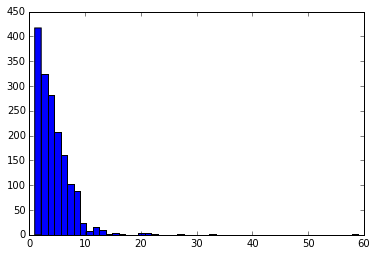

In [22]:
print(len(cnv))
nbcnv = [len(cnv[sb]) for sb in cnv]
hist = plt.hist(nbcnv, bins=50)
print(np.max(np.asarray(nbcnv)))

In [23]:
# definition of dangerosity from a list of cnv
def dangerosity(listofcnvs):
    """
    inputs: list tuples (danger_score, proba_cnv)
    returns: a dangerosity score 
    """
    last = -1 #slicing the last
    tmp = [np.asarray(t) for t in zip(*listofcnvs)]
    return tmp[0].dot(tmp[1])

# or: return np.asarray([dgr*prob for (dgr,prob) in listofcnvs]).cumsum()[last]


### Testing dangerosity

In [24]:
for k in range(1,30, 30):
    print(cnv[cnv.keys()[k]], ' yields ', dangerosity(cnv[cnv.keys()[k]]))
    
test_dangerosity_input = [[(1., .5), (1., .5), (1., .5), (1., .5)],
                          [(2., 1.)],
                          [(10000., 0.)]]
test_dangerosity_output = [2., 2., 0]

#print( [dangerosity(icnv) for icnv in test_dangerosity_input]) # == test_dangerosity_output
assert( [dangerosity(icnv) for icnv in test_dangerosity_input] == test_dangerosity_output)

[(0.99999942000033648, 0.17050257142857136), (0.48377137638161954, 0.1629047714285713), (0.49999999999999989, 0.42222357142857136), (1.1666666666666665, 0.6306365714285714)]  yields  1.19616559041


### Printing out results

In [25]:
dtime = datetime.now().strftime("%y-%m-%d_h%H-%M")
outfile = dtime+'dangerosity_cnv.txt'
fulloutfile = osp.join(CWD, outfile)

with open(fulloutfile, 'w') as outf:
    for sub in cnv:
        outf.write("\t".join([sub, str(dangerosity(cnv[sub]))]) + "\n")